In [40]:
import pandas as pd

#INTRO:

#Buscamos ver si existe alguna relacion entre el Total Amount de una oportunidad y su probabilidad de exito
#La probabilidad sera calculada discretizando Total Amount segun se crea conveniente
#Se trabajara por grupos de regiones de forma individual


#Cargo un csv ya filtrado y limpio.

data = pd.read_csv("Entrenamieto_ECI_2020_Total_Amount.csv")
opp_total_amount = data.loc[:, ['Opportunity_ID', 'Total_Amount(USD)', 'Stage']]
opp_total_amount.Stage = (opp_total_amount.Stage == 'Closed Won').astype(int)
opp_total_amount = opp_total_amount.groupby('Opportunity_ID')\
                                                     .agg({'Total_Amount(USD)' : 'sum', 'Stage' : 'max'})\
                                                     .reset_index()\
                                                     .rename(columns={'Stage' : 'Closed_Won', \
                                                                      'Total_Amount(USD)' : 'Opportunity_Total_Amount'})\
                                                                          [['Opportunity_Total_Amount', 'Closed_Won']]



total_amount_by_territory.head(3)

,Discretized_Total_Amount,Closed_Won_mean,Closed_Won_number
1,1000.0,0.900000,30
2,2000.0,0.972973,37
3,3000.0,0.886364,88


In [41]:
def discretizar(val, delta):
    low = (val // delta) * delta
    high = low + delta
    return high if (abs(val - high) < abs(val - low)) else low

opp_total_amount['Discretized_Total_Amount'] = opp_total_amount['Opportunity_Total_Amount']\
                                                        .apply(lambda x: discretizar(x, 1000))
opp_total_amount = opp_total_amount.groupby('Discretized_Total_Amount')\
                                                     .agg({'Closed_Won' : ['mean', 'count']})\
                                                     .reset_index()

opp_total_amount.columns = ['Discretized_Total_Amount', 'Closed_Won_mean', 'Closed_Won_number']

opp_total_amount = opp_total_amount.loc[opp_total_amount.Closed_Won_number > 20]

opp_total_amount.head(10)

,Discretized_Total_Amount,Closed_Won_mean,Closed_Won_number
0,0.0,0.967742,31
1,1000.0,0.851064,47
2,2000.0,0.671233,73
3,3000.0,0.738636,176
4,4000.0,0.734375,192
5,5000.0,0.740933,193
6,6000.0,0.784173,139
7,7000.0,0.785714,70
8,8000.0,0.836066,61
9,9000.0,0.654545,55


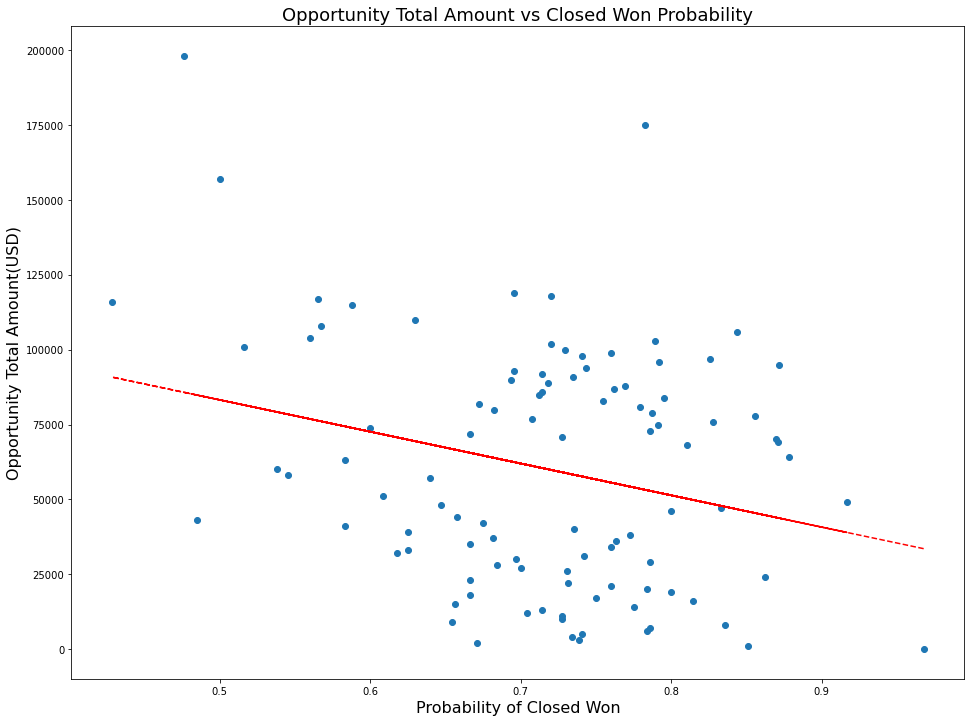

In [42]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

x = opp_total_amount.Closed_Won_mean.tolist()
y = opp_total_amount.Discretized_Total_Amount.tolist()

plt.figure(figsize=(16, 12))

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("Opportunity Total Amount vs Closed Won Probability", fontdict={'size' : 18})
plt.xlabel("Probability of Closed Won", fontdict={'size' : 16})
plt.ylabel("Opportunity Total Amount(USD)", fontdict={'size' : 16})

plt.show()

In [43]:
# Del grafico observamos que existe una correlacion lineal entre ambos parametros, siendo que la oportunidad de exito aumenta para oportunidades que mueven menor cantidad de dinero.